<a href="https://colab.research.google.com/github/dem0nsl4yer/Calorie_counter/blob/main/Calorie_counter-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github/dem0nsl4yer/Calorie_counter

## Import the chosen dataset 
We want to use a standardized dataset - lets use Food 101 data from ETH Zurich. 

Load all the dependencies

In [1]:
import os
from PIL import Image
import numpy as np
from keras import models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from keras.preprocessing import image
import requests
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from tensorflow.keras.preprocessing import image
from Calorie_counter.predict import predict_class

Importing images to test out. Feel free to modify the links to whatever images you would like to test.

In [3]:
!wget -O carb.jpg https://img.taste.com.au/86bOXAkG/taste/2016/11/carbonara-sauce-28894-1.jpeg
!wget -O sashimi.jpg https://www.asiancaucasian.com/wp-content/uploads/2021/03/Salmon-Sashimi-with-Ponzu_550x550-2.jpg
!wget -O porkchop.jpg https://hips.hearstapps.com/delish/assets/18/11/1520972774-pork-chops-horizontal.jpg
!wget -O falafel.jpg https://dailydish.co.uk/wp-content/uploads/2022/05/air-fryer-falafel-gyros.jpg

print("The chosen images are for: ['carbonara', 'sashimi', 'pork chop', 'takoyaki']") 

--2023-06-01 21:53:22--  https://img.taste.com.au/86bOXAkG/taste/2016/11/carbonara-sauce-28894-1.jpeg
Resolving img.taste.com.au (img.taste.com.au)... 23.49.100.142
Connecting to img.taste.com.au (img.taste.com.au)|23.49.100.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379619 (371K) [image/jpeg]
Saving to: ‘carb.jpg’

carb.jpg            100%[===================>] 370.72K  --.-KB/s    in 0.04s   

2023-06-01 21:53:22 (10.3 MB/s) - ‘carb.jpg’ saved [379619/379619]

--2023-06-01 21:53:22--  https://www.asiancaucasian.com/wp-content/uploads/2021/03/Salmon-Sashimi-with-Ponzu_550x550-2.jpg
Resolving www.asiancaucasian.com (www.asiancaucasian.com)... 23.239.19.147
Connecting to www.asiancaucasian.com (www.asiancaucasian.com)|23.239.19.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426606 (417K) [image/jpeg]
Saving to: ‘sashimi.jpg’

sashimi.jpg         100%[===================>] 416.61K  --.-KB/s    in 0.06s   

2023-06-01 21:53

# Load the tried and tested model on 51 classes - 
- food_list = ['baby_back_ribs', 'baklava', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'caprese_salad', 'carrot_cake', 'cheese_plate', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'falafel', 'foie_gras', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'greek_salad', 'huevos_rancheros', 'ice_cream', 'lasagna', 'macaroni_and_cheese', 'miso_soup', 'mussels', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pizza', 'pork_chop', 'poutine', 'ramen', 'red_velvet_cake', 'risotto', 'seaweed_salad', 'shrimp_and_grits', 'spring_rolls', 'steak', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

In [17]:
import gdown

url = 'https://drive.google.com/uc?id=1hujYuGsVFK-CEFh4MZPg60AqPfaXEM-7'
output = 'model_trained_51class.hdf5'  # Specify the desired output filename and extension

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hujYuGsVFK-CEFh4MZPg60AqPfaXEM-7
To: /content/model_trained_51class.hdf5
100%|██████████| 178M/178M [00:01<00:00, 94.9MB/s]


'model_trained_51class.hdf5'

In [18]:
K.clear_session()
model = load_model('model_trained_51class.hdf5',compile = False)

['carb.jpg', 'sashimi.jpg', 'porkchop.jpg', 'falafel.jpg']
1/1 [==============================] - 3s 3s/step


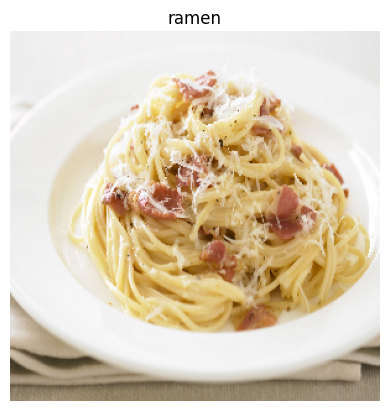

ramen
Reality check----->>>>
{'Real name': 'ramen', 'Calories_consumed': '0.88 cal/g'}
1/1 [==============================] - 0s 436ms/step


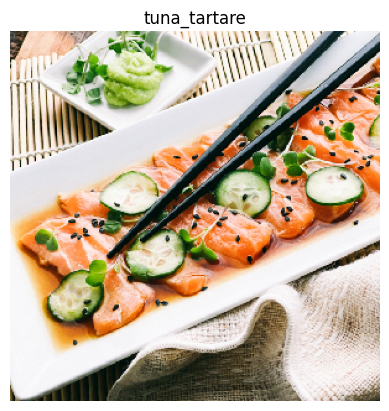

tuna_tartare
Reality check----->>>>
{'Real name': 'tuna', 'Calories_consumed': '1.33 cal/g'}
1/1 [==============================] - 0s 253ms/step


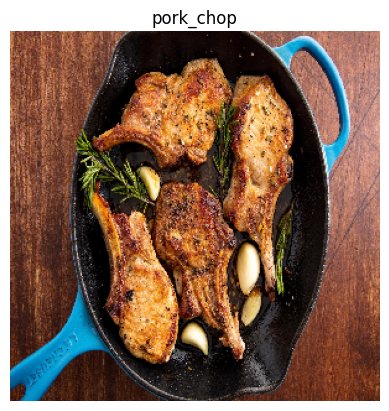

pork_chop
Reality check----->>>>
{'Real name': 'pork chop', 'Calories_consumed': '2.09 cal/g'}
1/1 [==============================] - 0s 269ms/step


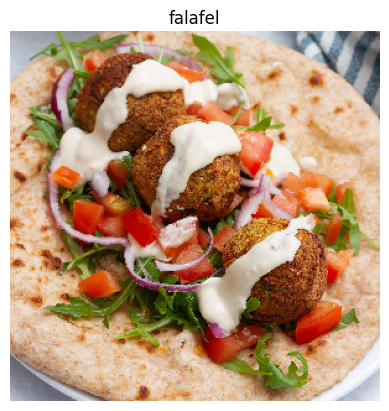

falafel
Reality check----->>>>
{'Real name': 'falafel', 'Calories_consumed': '3.33 cal/g'}


In [19]:
# Make a list of downloaded images and test the trained model
#from tensorflow.keras.preprocessing import image

images = []
images.append('carb.jpg')
images.append('sashimi.jpg')
images.append('porkchop.jpg')
images.append('falafel.jpg')
print(images)
predict_class(model, images, True)